In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/ML project/ai511-homeloan-2022/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML project/ai511-homeloan-2022/test_data.csv")

In [4]:
print("Shape of train data :",end=' ')
print(data.shape)
print("Shape of test data :",end=' ')
print(test_data.shape)

Shape of train data : (184506, 122)
Shape of test data : (123005, 121)


to see all columns and rows

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [6]:
data.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018634,-17210,-774,-5580.0,-755,NaN,1,1,1,1,0,0,Sales staff,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.264354,NaN,0.0124,NaN,0.9444,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0095,NaN,0.0000,0.0126,NaN,0.9444,NaN,NaN,0.0000,0.0345,0.0417,NaN,NaN,NaN,0.0099,NaN,0.0000,0.0125,NaN,0.9444,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0074,Mixed,No,0.0,0.0,0.0,0.0,-150.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.018850,-18640,-96,-5711.0,-2175,25.0,1,1,0,1,0,1,Managers,3.0,2,2,TUESDAY,10,0,0,0,0,1,1,Business Entity Type 3,0.581064,0.172251,0.686382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-444.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,"Spouse, partner",Working,Higher education,Married,House / apartment,0.022625,-14649,-6130,-1776.0,-4568,9.0,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 4,NaN,0.636218,0.540654,0.1979,0.1169,0.9841,0.7824,0.1119,0.16,0.0690,0.4583,0.5000,0.1587,0.1614,0.1033,0.0000,0.1880,0.2017,0.1213,0.9841,0.7909,0.1130,0.1611,0.0690,0.4583,0.5000,0.1623,0.1763,0.1076,0.0000,0.1990,0.1999,0.1169,0.9841,0.7853,0.1127,0.16,0.0690,0.4583,0.5000,0.1615,0.1642,0.1051,0.0000,0.1919,reg oper account,block of flats,0.1789,Panel,No,1.0,0.0,1.0

dropping col 'ID'

In [7]:
# data.drop(["SK_ID_CURR"], axis =1, inplace =True)
# test_data.drop(["SK_ID_CURR"], axis =1, inplace =True)

Checkig duplicates - No duplicates found

In [8]:
data.duplicated().sum()

0

checking null values in each column in %

In [9]:
feature_null = [features for features in data.columns if data[features].isnull().sum()>0]

for feature in feature_null:
  print(feature,":", np.round(data[feature].isnull().mean()*100,4), '% missing values')

AMT_ANNUITY : 0.0033 % missing values
AMT_GOODS_PRICE : 0.0905 % missing values
NAME_TYPE_SUITE : 0.4173 % missing values
OWN_CAR_AGE : 65.9236 % missing values
OCCUPATION_TYPE : 31.3632 % missing values
CNT_FAM_MEMBERS : 0.0005 % missing values
EXT_SOURCE_1 : 56.4068 % missing values
EXT_SOURCE_2 : 0.2238 % missing values
EXT_SOURCE_3 : 19.8671 % missing values
APARTMENTS_AVG : 50.7165 % missing values
BASEMENTAREA_AVG : 58.5211 % missing values
YEARS_BEGINEXPLUATATION_AVG : 48.7247 % missing values
YEARS_BUILD_AVG : 66.5328 % missing values
COMMONAREA_AVG : 69.9007 % missing values
ELEVATORS_AVG : 53.2882 % missing values
ENTRANCES_AVG : 50.3003 % missing values
FLOORSMAX_AVG : 49.7144 % missing values
FLOORSMIN_AVG : 67.8807 % missing values
LANDAREA_AVG : 59.371 % missing values
LIVINGAPARTMENTS_AVG : 68.4054 % missing values
LIVINGAREA_AVG : 50.1523 % missing values
NONLIVINGAPARTMENTS_AVG : 69.4536 % missing values
NONLIVINGAREA_AVG : 55.1679 % missing values
APARTMENTS_MODE : 50

In [10]:
data.nunique()

SK_ID_CURR                      184506
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        14
AMT_INCOME_TOTAL                  1768
AMT_CREDIT                        4855
AMT_ANNUITY                      12412
AMT_GOODS_PRICE                    793
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17334
DAYS_EMPLOYED                    11404
DAYS_REGISTRATION                15002
DAYS_ID_PUBLISH                   6086
OWN_CAR_AGE                         60
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE               

In [11]:
data.drop(["FLAG_DOCUMENT_12"],axis = 1, inplace = True) # All the values in this column are the same, so it is not adding any new value to the data, so we dropped it
test_data.drop(["FLAG_DOCUMENT_12"],axis = 1, inplace = True) # All the values in this column are the same, so it is not adding any new value to the data, so we dropped it

checking correlation between columns

In [12]:
corr = data.corr()
corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
SK_ID_CURR,1.000000,-0.002323,-0.002925,-0.001419,-0.001797,-0.001051,0.000210,-0.002765,0.001957,-0.002663,-0.000486,0.007294,0.003617,-0.001961,-0.003428,0.003289,0.001879,0.000459,-0.004071,0.000339,0.000092,0.002464,-0.002461,-0.001659,0.001015,-0.002192,-0.002842,-0.001177,0.001616,0.001384,1.571903e-03,0.003552,-0.001112,0.002865,0.009367,0.001939,0.007050,-0.004106,0.008482,0.002583,0.001564,0.005453,0.004116,-0.003607,0.007001,0.003695,-0.000075,0.003118,0.008263,0.002814,0.007556,-0.003798,0.008288,0.001527,0.001270,0.005885,0.004408,-0.002749,0.005705,0.003726,-0.000483,0.002502,0.009077,0.002233,0.006858,-0.004086,0.008221,0.002195,0.001565,0.005471,0.004039,-0.004441,0.006431,0.004454,-0.002046,0.001548,-0.002191,0.002932,0.000019,0.001150,-0.002684,-0.003481,-0.002549,0.003516,-0.004040,-0.000315,0.002284,-0.003435,-0.001132,-0.000821,-0.000600,0.003497,-0.000823,0.002291,0.002606,-0.001880,0.001564,0.000291,-2.204371e-03,-0.001736,0.001604,-0.000907,0.001448,0.004048,-0.000570
CNT_CHILDREN,-0.002323,1.000000,0.012412,0.004094,0.025078,0.000308,-0.023497,0.330827,-0.240104,0.184052,-0.027332,0.007761,0.001347,0.241009,0.055808,-0.002328,-0.032419,0.024306,0.878366,0.024697,0.023332,-0.005188,-0.012389,0.008882,0.015546,0.022805,0.072071,0.069332,-0.134094,-0.015945,-4.316071e-02,-0.011978,-0.009822,0.008402,0.033074,0.002569,-0.004188,-0.008107,-0.005473,-0.004901,-0.005537,-0.004812,-0.008169,0.001761,0.002536,-0.011423,-0.009557,0.007252,0.032171,0.002644,-0.004155,-0.006792,-0.005839,-0.004720,-0.004924,-0.003817,-0.007960,0.001241,0.003042,-0.011837,-0.009665,0.007893,0.032888,0.003143,-0.004048,-0.008229,-0.005238,-0.004500,-0.005514,-0.004419,-0.008256,0.001634,0.003078,-0.006734,0.014868,-0.000762,0.014627,-0.000949,-0.007501,0.002549,0.057111,-0.003201,-0.016887,-0.156982,-0.003235,0.050263,0.000383,-0.002695,-0.003619,0.004205,-0.004113,0.001773,0.012282,0.004657,0.003690,0.001710,0.001769,-0.002919,3.207724e-03,-0.001002,-0.001852,-0.012725,-0.006363,-0.041662,0.020011
AMT_INCOME_TOTAL,-0.002925,0.012412,1.000000,0.126582,0.155473,0.128758,

checking correlation between each column with TARGET

In [13]:
 corr_matrix=data.corr()
 corr_matrix["TARGET"]

SK_ID_CURR                     -0.000570
CNT_CHILDREN                    0.020011
AMT_INCOME_TOTAL               -0.000685
AMT_CREDIT                     -0.030653
AMT_ANNUITY                    -0.011600
AMT_GOODS_PRICE                -0.040055
REGION_POPULATION_RELATIVE     -0.039028
DAYS_BIRTH                      0.080821
DAYS_EMPLOYED                  -0.046875
DAYS_REGISTRATION               0.043995
DAYS_ID_PUBLISH                 0.051051
OWN_CAR_AGE                     0.038363
FLAG_MOBIL                      0.000690
FLAG_EMP_PHONE                  0.047956
FLAG_WORK_PHONE                 0.029652
FLAG_CONT_MOBILE                0.000515
FLAG_PHONE                     -0.023338
FLAG_EMAIL                     -0.001689
CNT_FAM_MEMBERS                 0.009743
REGION_RATING_CLIENT            0.061597
REGION_RATING_CLIENT_W_CITY     0.063491
HOUR_APPR_PROCESS_START        -0.023168
REG_REGION_NOT_LIVE_REGION      0.004225
REG_REGION_NOT_WORK_REGION      0.006214
LIVE_REGION_NOT_

In [14]:
data.isnull().sum()

SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          6
AMT_GOODS_PRICE                    167
NAME_TYPE_SUITE                    770
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     121633
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

filling missing values

In [15]:
columns_to_be_deleted = data.columns[data.isna().sum()>100000]

In [16]:
data.drop(axis="columns", labels = columns_to_be_deleted, inplace = True)
test_data.drop(axis="columns", labels = columns_to_be_deleted, inplace = True)

In [17]:
data.shape

(184506, 94)

In [18]:
data.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         6
AMT_GOODS_PRICE                   167
NAME_TYPE_SUITE                   770
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_T

calculating numerical_features

In [19]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print(len(numerical_features))

79


In [20]:
numerical_features

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVI

calculating those columns which has atleast 30 unique values

In [21]:

uniquecol=[]

for column in numerical_features :
  if (len(data[column].unique()))>20 :
    uniquecol.append(column)


filling those columns with mean

In [22]:
uniquecol

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [23]:
for col in uniquecol :
  data[col] = data[col].fillna(data[col].mean())

In [24]:
for col in uniquecol :
  test_data[col] = test_data[col].fillna(test_data[col].mean())

In [25]:
data.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   770
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_T

In [26]:
test_data.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   522
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_T

6 object columns are left with null values

filling above column with mode

In [27]:
remaining_col = []
for col in data.columns:
  if data[col].isna().sum()>0 :
    remaining_col.append(col)

In [28]:
remaining_col

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT']

In [29]:
for col in remaining_col:
  data[col] = data[col].fillna(data[col].mode()[0])

In [30]:
for col in remaining_col:
  test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [31]:
data.isna().sum()

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

all null values removed

In [32]:
data["CODE_GENDER"].value_counts()

F      121357
M       63147
XNA         2
Name: CODE_GENDER, dtype: int64

In [33]:
test_data['CODE_GENDER'].value_counts()

F      81091
M      41912
XNA        2
Name: CODE_GENDER, dtype: int64

In [34]:
for i in range(len(data["CODE_GENDER"])):
      if(data["CODE_GENDER"][i]=='XNA'):
        data["CODE_GENDER"][i]='M'

<ipython-input-34-cfb7635f24a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CODE_GENDER"][i]='M'


In [35]:
for i in range(len(test_data["CODE_GENDER"])):
      if(test_data["CODE_GENDER"][i]=='XNA'):
        test_data["CODE_GENDER"][i]='M'

<ipython-input-35-e507bc4953bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["CODE_GENDER"][i]='M'


In [36]:
# data.drop(data[data["CODE_GENDER"] == 'XNA'].index, inplace = True)

In [37]:
# test_data.drop(test_data[test_data["CODE_GENDER"] == 'XNA'].index, inplace = True)

In [38]:
data["CODE_GENDER"].value_counts()

F    121357
M     63149
Name: CODE_GENDER, dtype: int64

In [39]:
data["FLAG_OWN_CAR"].value_counts()

N    121630
Y     62876
Name: FLAG_OWN_CAR, dtype: int64

In [40]:
data["FLAG_OWN_REALTY"].value_counts()

Y    128059
N     56447
Name: FLAG_OWN_REALTY, dtype: int64

In [41]:
data['CNT_CHILDREN'].value_counts()

0     129082
1      36984
2      15938
3       2190
4        237
5         48
6         12
7          5
14         2
12         2
8          2
9          2
10         1
19         1
Name: CNT_CHILDREN, dtype: int64

**Checking Descrete Features**

In [42]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<3]
print("discrete variables are:" ,len(discrete_features))

discrete variables are: 32


In [43]:
discrete_features

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'TARGET']

In [44]:
data[discrete_features].head(20)

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**continuous features**

In [45]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("continuous feature count : ", len(continuous_features))

continuous feature count :  47


In [46]:
continuous_features

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CRE

calculating object features

In [47]:
object_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print("No. of categorical attrubutes are :",len(object_features))

No. of categorical attrubutes are : 15


In [48]:
object_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [49]:
data[object_features].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

label_encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in object_features:
  data[col]= labelencoder.fit_transform(data[col])
  test_data[col]= labelencoder.fit_transform(test_data[col])

one_hot_encoding

In [51]:
# data = pd.get_dummies(data, columns = to_one_hot_encode)
# test_data = pd.get_dummies(test_data, columns = to_one_hot_encode)

we tried one hot encoding but results did not improve as compared to binary

frequency encoding

In [52]:
# ENC_OCCUPATION_TYPE = (data.groupby("OCCUPATION_TYPE").size())/len(data)
# ENC_OCCUPATION_TYPE

In [53]:
# data["ENC_OCCUPATION_TYPE"] = data["OCCUPATION_TYPE"].apply(lambda x : ENC_OCCUPATION_TYPE[x])
# test_data["ENC_OCCUPATION_TYPE"] = data["OCCUPATION_TYPE"].apply(lambda x : ENC_OCCUPATION_TYPE[x])

In [54]:
# ENC_ORGANIZATION_TYPE = (data.groupby("ORGANIZATION_TYPE").size())/len(data)
# ENC_ORGANIZATION_TYPE

In [55]:
# data["ENC_ORGANIZATION_TYPE"] = data["ORGANIZATION_TYPE"].apply(lambda x : ENC_ORGANIZATION_TYPE[x])
# test_data["ENC_ORGANIZATION_TYPE"] = data["ORGANIZATION_TYPE"].apply(lambda x : ENC_ORGANIZATION_TYPE[x])

we also tried frequency encoding but results were not good

In [56]:
# data.drop(axis = 1, inplace = True, labels = ["OCCUPATION_TYPE"])
# data.drop(axis = 1, inplace = True, labels = ["ORGANIZATION_TYPE"])
# test_data.drop(axis = 1, inplace = True, labels = ["OCCUPATION_TYPE"])
# test_data.drop(axis = 1, inplace = True, labels = ["ORGANIZATION_TYPE"])

In [57]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,0,0,0,1,1,67500.0,227520.0,11065.5,180000.0,1,1,4,1,1,0.018634,-17210,-774,-5580.0,-755,1,1,1,1,0,0,14,3.0,2,2,6,12,0,0,0,0,0,0,5,0.264354,0.510894,0.012400,0.944400,0.000000,0.034500,0.041700,0.009500,0.012600,0.944400,0.000000,0.034500,0.041700,0.00990,0.012500,0.944400,0.00000,0.034500,0.041700,0.009600,0,0.007400,1,0,0.0,0.0,0.0,0.0,-150.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,0,1,1,1,1,247500.0,1882372.5,65560.5,1719000.0,6,7,1,0,1,0.018850,-18640,-96,-5711.0,-2175,1,1,0,1,0,1,10,3.0,2,2,5,10,0,0,0,0,1,1,5,0.172251,0.686382,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,0.0,0.0,0.0,0.0,-444.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,0,1,1,1,1,180000.0,101880.0,10827.0,90000.0,5,7,1,1,1,0.022625,-14649,-6130,-1776.0,-4568,1,1,1,1,0,0,8,3.0,2,2,1,14,0,0,0,0,0,0,55,0.636218,0.540654,0.197900,0.984100,0.160000,0.069000,0.458300,0.103300,0.201700,0.984100,0.161100,0.069000,0.458300,0.10760,0.199900,0.984100,0.16000,0.069000,0.458300,0.105100,0,0.178900,4,0,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,0,1,0,0,0,81000.0,405000.0,20677.5,405000.0,6,7,4,3,5,0.035792,-12762,-5891,-6430.0,-4618,1,1,1,1,1,0,8,1.0,2,2,6,18,0,0,0,0,1,1,33,0.599924,0.337673,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,7.0,1.0,7.0,1.0,-1671.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,0,0,0,1,0,157500.0,888840.0,29506.5,675000.0,6,7,4,0,1,0.018801,-16329,-345,-1413.0,-4624,1,1,0,1,0,0,14,2.0,2,2,5,9,0,0,0,0,1,1,5,0.312779,0.819318,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,2.0,0.0,2.0,0.0,-28.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [58]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,367294,0,0,0,1,0,180000.0,265306.5,25317.0,252000.0,6,1,4,1,1,0.032561,-21413,-5323,-3666.0,-4551,1,1,0,1,1,0,8,2.0,1,1,5,17,0,0,0,0,0,0,5,0.708546,0.510791,0.239700,0.990100,0.280000,0.129300,0.520800,0.178300,0.050400,0.983100,0.080600,0.034500,0.33330,0.028000,0.205600,0.990100,0.28000,0.120700,0.541700,0.129900,0,0.236200,4,0,1.0,0.0,1.0,0.0,-1547.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.000000,2.0,5.000000
1,439847,0,0,0,1,0,202500.0,346500.0,21069.0,346500.0,6,7,4,2,1,0.026392,-20087,-1406,-7258.0,-3639,1,1,0,1,0,0,14,1.0,2,2,4,13,0,0,0,0,0,0,51,0.649626,0.513694,0.195900,0.987100,0.000000,0.448300,0.166700,0.174800,0.199600,0.987100,0.000000,0.448300,0.16670,0.182100,0.197800,0.987100,0.00000,0.448300,0.166700,0.177900,0,0.137500,4,0,0.0,0.0,0.0,0.0,-415.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.0,5.000000
2,380562,0,1,1,0,0,360000.0,545040.0,36553.5,450000.0,6,7,4,1,1,0.010032,-13008,-1874,-4975.0,-5324,1,1,0,1,0,0,10,2.0,2,2,5,4,0,0,0,0,0,0,5,0.645383,0.740799,0.082500,0.975700,0.000000,0.137900,0.166700,0.070400,0.084000,0.975700,0.000000,0.137900,0.16670,0.073300,0.083300,0.975700,0.00000,0.137900,0.166700,0.071700,0,0.071200,4,0,0.0,0.0,0.0,0.0,-2459.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,1.0,5.000000
3,407238,0,0,0,1,0,135000.0,307557.0,20682.0,265500.0,6,7,1,1,1,0.008625,-10699,-1454,-1020.0,-2220,1,1,0,1,0,0,14,2.0,2,2,6,10,0,0,0,0,1,1,42,0.409479,0.456110,0.117813,0.977645,0.079517,0.149946,0.226754,0.107779,0.114746,0.977039,0.075139,0.145503,0.22294,0.106448,0.118274,0.977634,0.07866,0.149436,0.226428,0.108996,0,0.103046,4,0,3.0,0.0,3.0,0.0,-564.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.000000,1.0,2.000000
4,239910,0,0,0,1,0,157500.0,1056447.0,31018.5,922500.0,1,3,4,1,1,0.010643,-18283,365243,-10425.0,-1829,1,0,0,1,1,0,8,2.0,2,2,6,14,0,0,0,0,0,0,57,0.265227,0.510791,0.117813,0.977645,0.079517,0.149946,0.226754,0.107779,0.114746,0.977039,0.075139,0.145503,0.22294,0.106448,0.118274,0.977634,0.07866,0.149436,0.226428,0.108996,0,0.103046,4,0,3.0,0.0,3.0,0.0,-657.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.267618,0.0,1.903676


In [59]:
data.isna().sum()

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

In [60]:
test_data.isna().sum()

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

**NO MORE NULL VALUES IN TRAIN AND TEST data**

checking relationship between every continuous feature and count

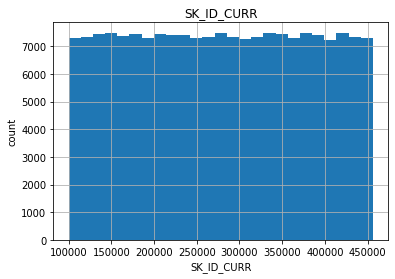

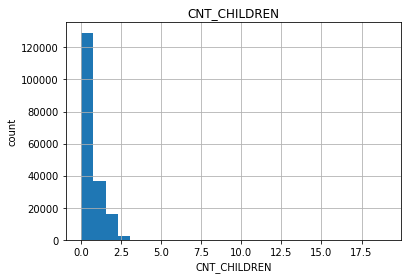

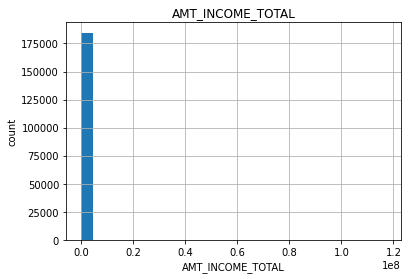

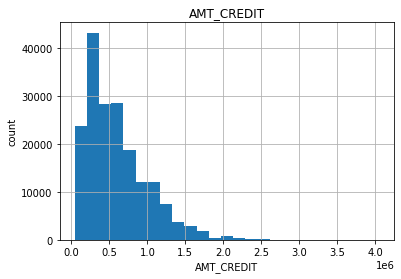

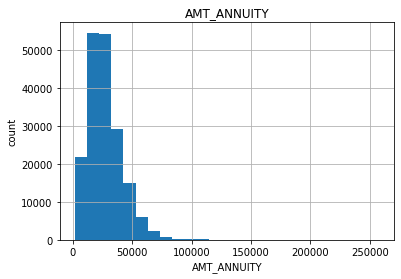

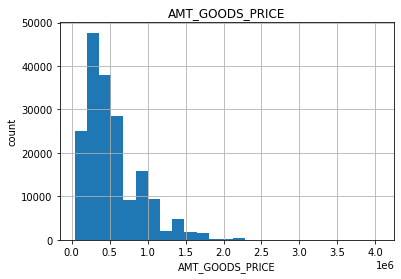

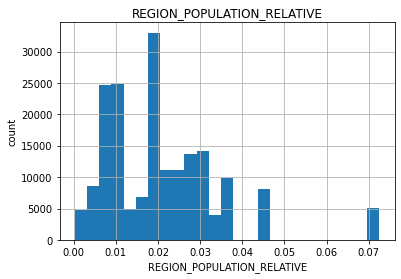

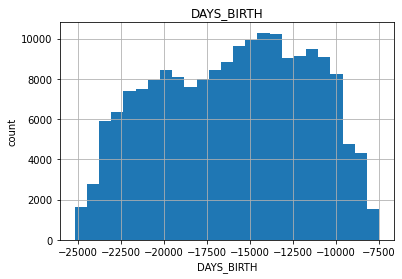

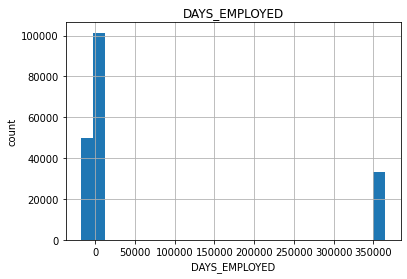

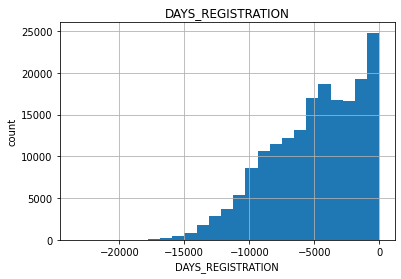

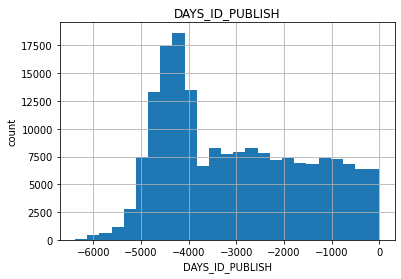

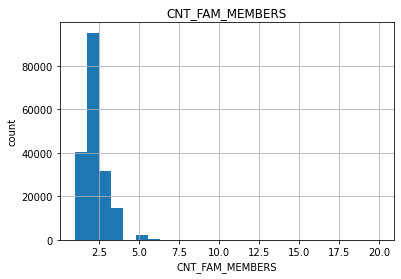

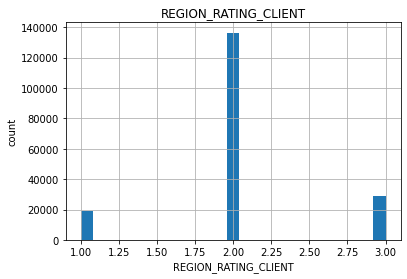

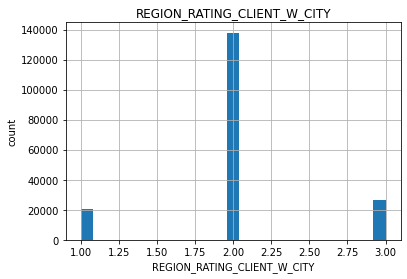

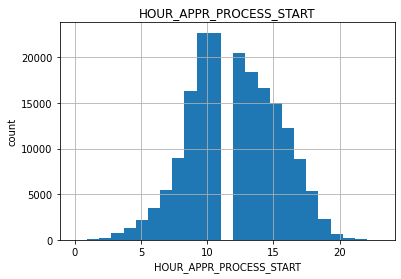

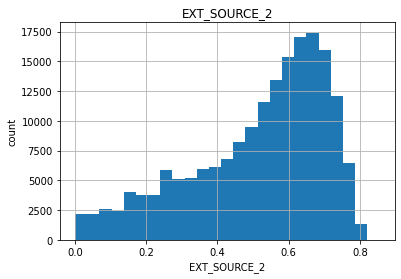

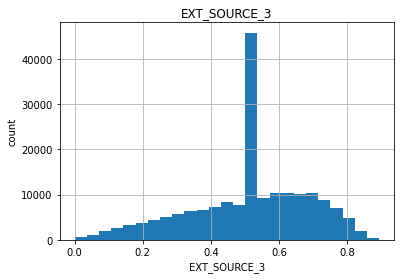

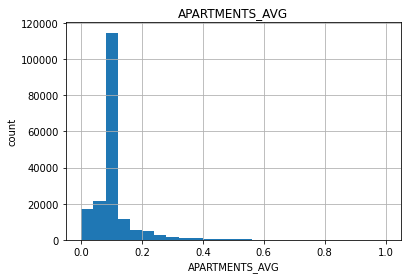

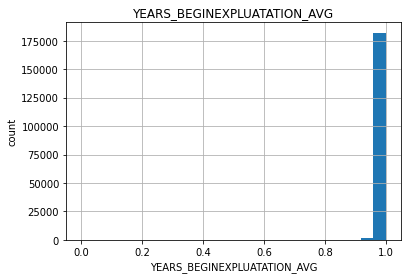

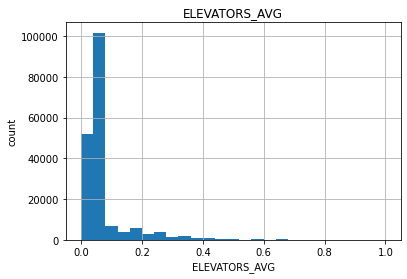

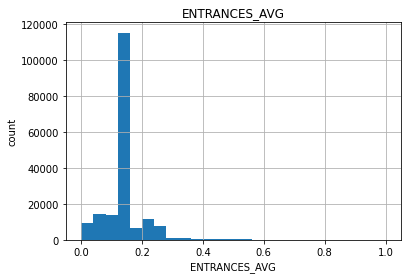

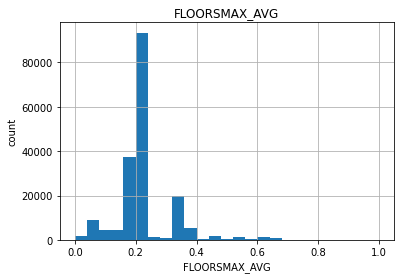

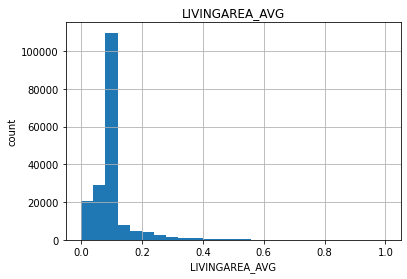

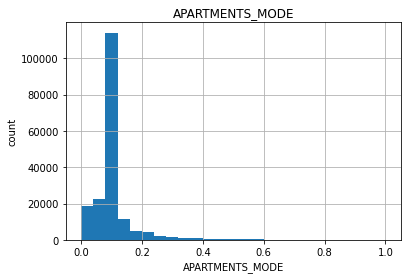

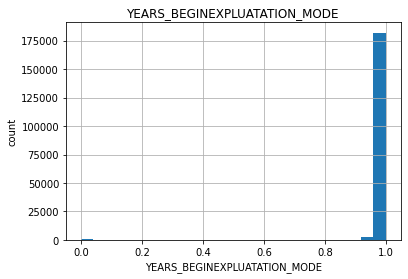

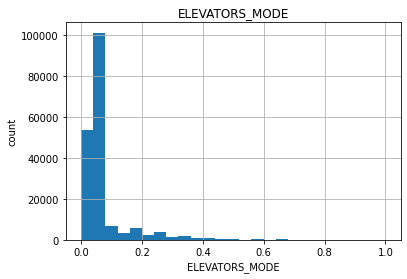

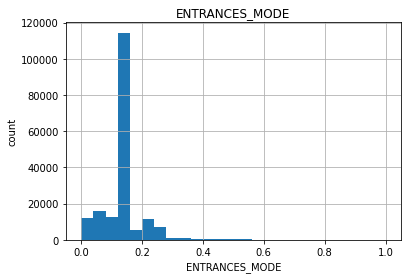

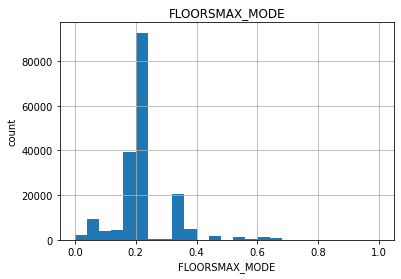

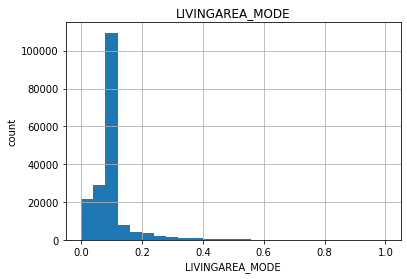

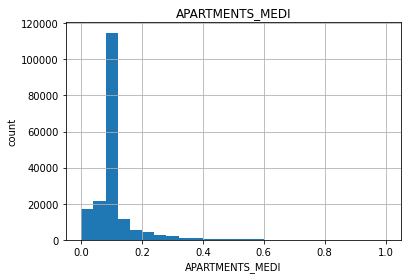

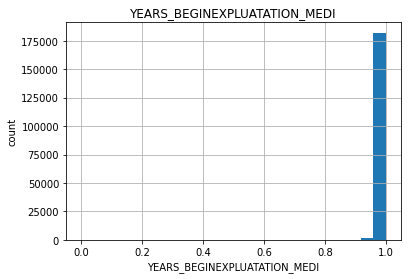

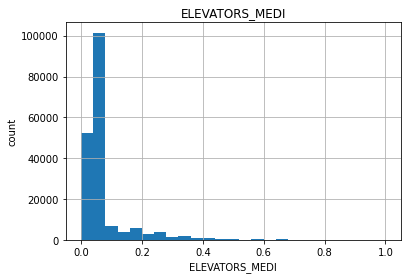

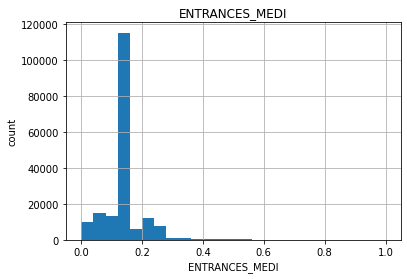

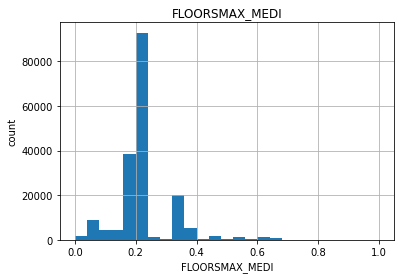

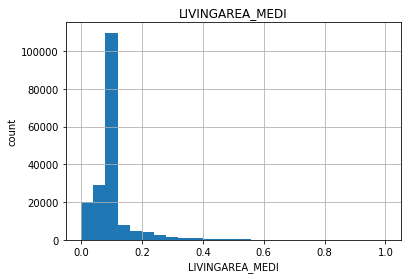

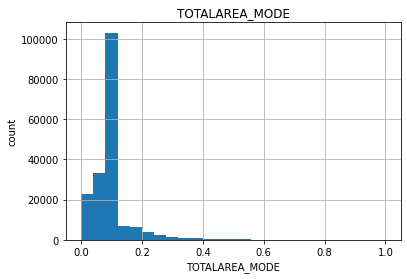

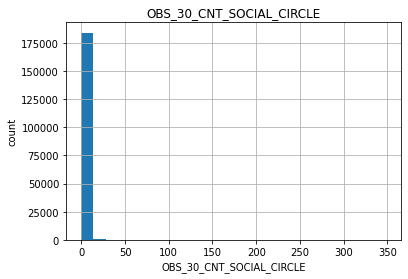

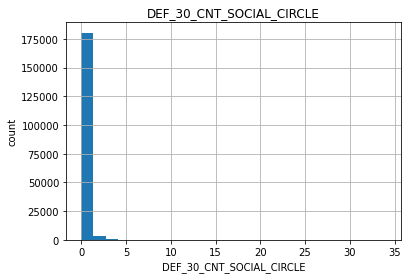

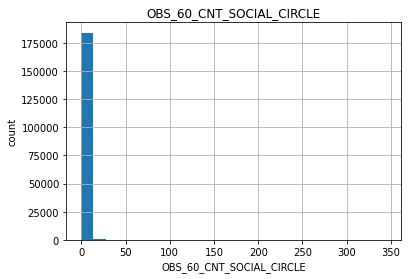

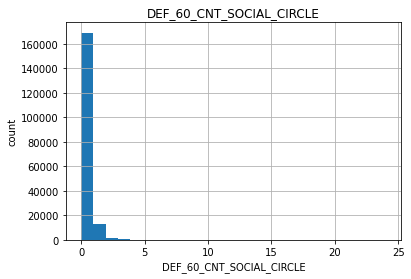

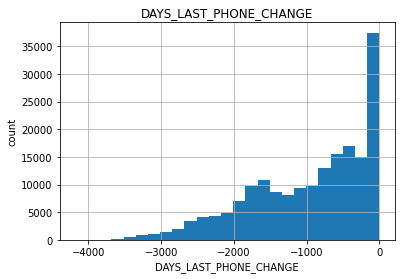

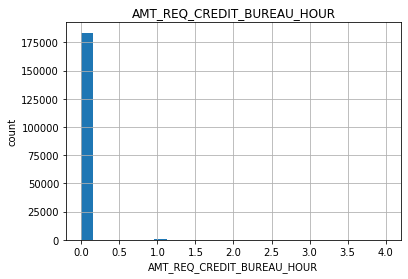

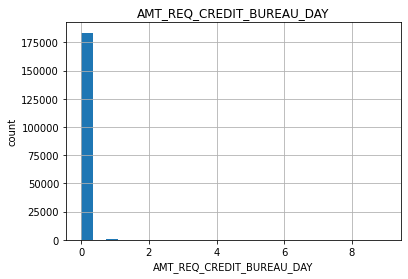

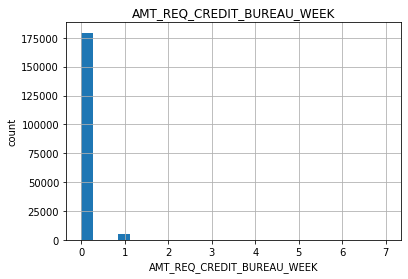

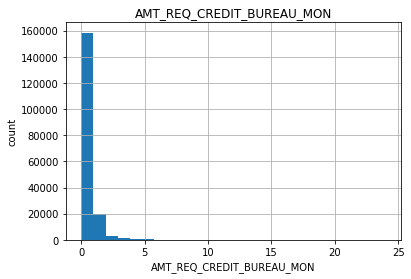

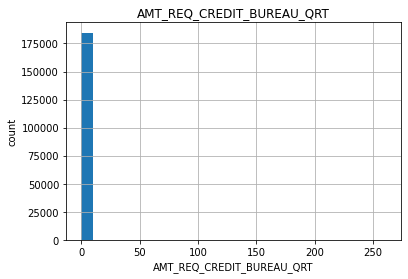

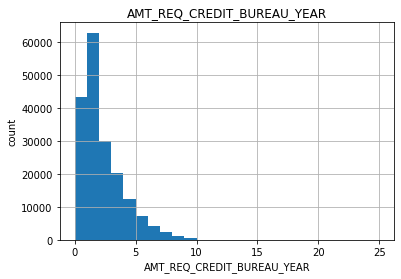

In [61]:
for feature in continuous_features:
  data = data.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("count")
  plt.title(feature)
  plt.show()

**NORMALIZATION**

In [62]:
data.nunique()

SK_ID_CURR                      184506
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        14
AMT_INCOME_TOTAL                  1768
AMT_CREDIT                        4855
AMT_ANNUITY                      12413
AMT_GOODS_PRICE                    794
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17334
DAYS_EMPLOYED                    11404
DAYS_REGISTRATION                15002
DAYS_ID_PUBLISH                   6086
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL               

In [63]:
data.isna().sum()

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

CHECKING OUTLIERS

In [64]:
data.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
count,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,1.845060e+05,1.845060e+05,184506.000000,1.845060e+05,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.00000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000
mean,278031.658488,0.094810,0.342260,0.340780,0.694064,0.416463,1.689985e+05,5.992854e+05,27114.455805,5.386926e+05,5.222687,4.670905,3.189609,1.469345,1.289562,0.020868,-16036.718307,63838.583271,-4984.89506,-2994.113948,0.999995,0.819849,0.199115,0.998043,0.281611,0.056638,7.899786,2.152705,2.051787,2.031332,3.096024,12.062963,0.015176,0.051299,0.041175,0.078778,0.230323,0.179257,29.446175,0.514616,0.510894,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.105660,0.117568,0.977831,0.077690,0.149065,0.225543,0.108348,0.013300,0.102215,4.084252,0.007821,1.426101,0.143811,1.409247,0.100257,-961.984591,0.000038,0.708389,0.000092,0.015588,0.088339,0.000179,0.082312,0.003837,0.000022,0.004027,0.003734,0.002921,0.001295,0.009674,0.000271,0.007870,0.000629,0.000553,0.000325,0.005479,0.006341,0.029739,0.267247,0.230627,1.897504,0.080729
std,102789.553650,0.292953,0.474467,0.473973,0.460804,0.719614,2.942453e+05,4.

observing the above description of our data and checking outliers in suspected columns

In [65]:
data.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,0,0,0,1,1,67500.0,227520.0,11065.5,180000.0,1,1,4,1,1,0.018634,-17210,-774,-5580.0,-755,1,1,1,1,0,0,14,3.0,2,2,6,12,0,0,0,0,0,0,5,0.264354,0.510894,0.012400,0.944400,0.000000,0.034500,0.041700,0.009500,0.012600,0.944400,0.000000,0.034500,0.041700,0.00990,0.012500,0.944400,0.00000,0.034500,0.041700,0.009600,0,0.007400,1,0,0.0,0.0,0.0,0.0,-150.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.000000,0.0,2.000000,0
1,271298,0,1,1,1,1,247500.0,1882372.5,65560.5,1719000.0,6,7,1,0,1,0.018850,-18640,-96,-5711.0,-2175,1,1,0,1,0,1,10,3.0,2,2,5,10,0,0,0,0,1,1,5,0.172251,0.686382,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,0.0,0.0,0.0,0.0,-444.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,1.0,3.000000,0
2,122238,0,1,1,1,1,180000.0,101880.0,10827.0,90000.0,5,7,1,1,1,0.022625,-14649,-6130,-1776.0,-4568,1,1,1,1,0,0,8,3.0,2,2,1,14,0,0,0,0,0,0,55,0.636218,0.540654,0.197900,0.984100,0.160000,0.069000,0.458300,0.103300,0.201700,0.984100,0.161100,0.069000,0.458300,0.10760,0.199900,0.984100,0.16000,0.069000,0.458300,0.105100,0,0.178900,4,0,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.000000,0.0,1.000000,0
3,305311,0,1,0,0,0,81000.0,405000.0,20677.5,405000.0,6,7,4,3,5,0.035792,-12762,-5891,-6430.0,-4618,1,1,1,1,1,0,8,1.0,2,2,6,18,0,0,0,0,1,1,33,0.599924,0.337673,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,7.0,1.0,7.0,1.0,-1671.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.0,2.000000,0
4,414121,0,0,0,1,0,157500.0,888840.0,29506.5,675000.0,6,7,4,0,1,0.018801,-16329,-345,-1413.0,-4624,1,1,0,1,0,0,14,2.0,2,2,5,9,0,0,0,0,1,1,5,0.312779,0.819318,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,2.0,0.0,2.0,0.0,-28.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.0,2.000000,0
5,188073,0,1,1,1,0,202500.0,1350000.0,64948.5,1350000.0,6,1,2,3,5,0.018209,-8792,-992,-4474.0,-1456,1,1,0,1,0,0,8,1.0,3,3,5,14,0,0,0,0,0,0,

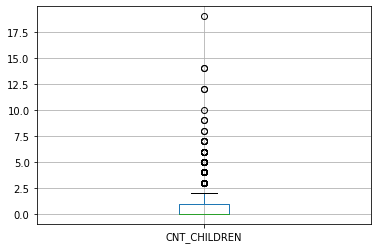

In [66]:
plt.figure
data.boxplot(["CNT_CHILDREN"])

In [67]:
(data["CNT_CHILDREN"]>6).sum()

15

In [68]:
data["CNT_CHILDREN"] = np.where(data["CNT_CHILDREN"]>=6,6,data["CNT_CHILDREN"])

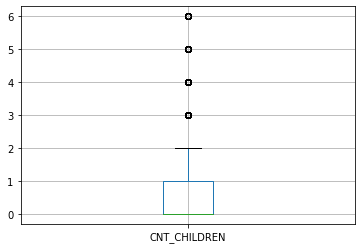

In [69]:
plt.figure
data.boxplot(["CNT_CHILDREN"])

In [70]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,0,0,0,1,1,67500.0,227520.0,11065.5,180000.0,1,1,4,1,1,0.018634,-17210,-774,-5580.0,-755,1,1,1,1,0,0,14,3.0,2,2,6,12,0,0,0,0,0,0,5,0.264354,0.510894,0.012400,0.944400,0.000000,0.034500,0.041700,0.009500,0.012600,0.944400,0.000000,0.034500,0.041700,0.00990,0.012500,0.944400,0.00000,0.034500,0.041700,0.009600,0,0.007400,1,0,0.0,0.0,0.0,0.0,-150.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,0,1,1,1,1,247500.0,1882372.5,65560.5,1719000.0,6,7,1,0,1,0.018850,-18640,-96,-5711.0,-2175,1,1,0,1,0,1,10,3.0,2,2,5,10,0,0,0,0,1,1,5,0.172251,0.686382,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,0.0,0.0,0.0,0.0,-444.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,0,1,1,1,1,180000.0,101880.0,10827.0,90000.0,5,7,1,1,1,0.022625,-14649,-6130,-1776.0,-4568,1,1,1,1,0,0,8,3.0,2,2,1,14,0,0,0,0,0,0,55,0.636218,0.540654,0.197900,0.984100,0.160000,0.069000,0.458300,0.103300,0.201700,0.984100,0.161100,0.069000,0.458300,0.10760,0.199900,0.984100,0.16000,0.069000,0.458300,0.105100,0,0.178900,4,0,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,0,1,0,0,0,81000.0,405000.0,20677.5,405000.0,6,7,4,3,5,0.035792,-12762,-5891,-6430.0,-4618,1,1,1,1,1,0,8,1.0,2,2,6,18,0,0,0,0,1,1,33,0.599924,0.337673,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,7.0,1.0,7.0,1.0,-1671.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,0,0,0,1,0,157500.0,888840.0,29506.5,675000.0,6,7,4,0,1,0.018801,-16329,-345,-1413.0,-4624,1,1,0,1,0,0,14,2.0,2,2,5,9,0,0,0,0,1,1,5,0.312779,0.819318,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,2.0,0.0,2.0,0.0,-28.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [71]:
x = data["TARGET"]

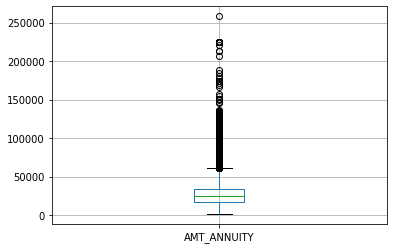

In [72]:
plt.figure
data.boxplot(["AMT_ANNUITY"])

In [73]:
(data["AMT_ANNUITY"]>200000).sum()

21

In [74]:
data["AMT_ANNUITY"] = np.where(data["AMT_ANNUITY"]>=200000,200000,data["AMT_ANNUITY"])

In [75]:
(data["AMT_ANNUITY"]>200000).sum()

0

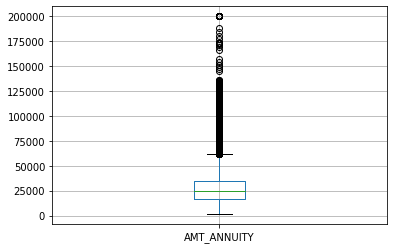

In [76]:
plt.figure
data.boxplot(["AMT_ANNUITY"])

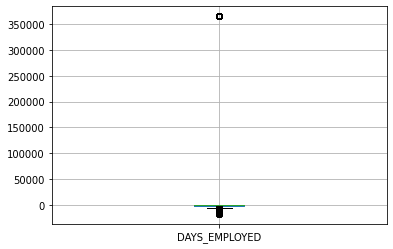

In [77]:
plt.figure
data.boxplot(["DAYS_EMPLOYED"])

In [78]:
(data["DAYS_EMPLOYED"]<0).sum()

151268

In [79]:
data.drop(["DAYS_EMPLOYED"],axis = 1, inplace = True)
test_data.drop(["DAYS_EMPLOYED"],axis = 1, inplace = True)

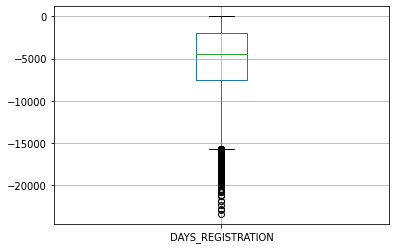

In [80]:
plt.figure
data.boxplot(["DAYS_REGISTRATION"])

In [81]:
data.drop(["DAYS_REGISTRATION"],axis = 1, inplace = True)
test_data.drop(["DAYS_REGISTRATION"],axis = 1, inplace = True)

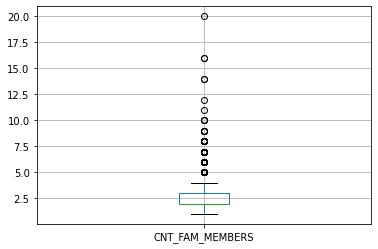

In [82]:
plt.figure
data.boxplot(["CNT_FAM_MEMBERS"])

In [83]:
(data["CNT_FAM_MEMBERS"]>6).sum()

72

In [84]:
data["CNT_FAM_MEMBERS"] = np.where(data["CNT_FAM_MEMBERS"]>=7,7,data["CNT_FAM_MEMBERS"])

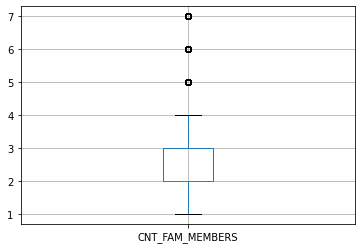

In [85]:
plt.figure
data.boxplot(["CNT_FAM_MEMBERS"])

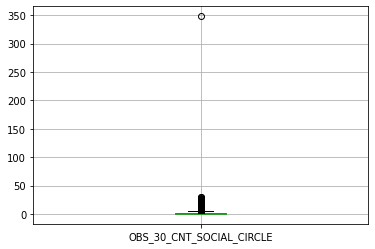

In [86]:
plt.figure
data.boxplot(["OBS_30_CNT_SOCIAL_CIRCLE"])

In [87]:
(data["OBS_30_CNT_SOCIAL_CIRCLE"]>30).sum()

1

In [88]:
data["OBS_30_CNT_SOCIAL_CIRCLE"] = np.where(data["OBS_30_CNT_SOCIAL_CIRCLE"]>=30,30,data["OBS_30_CNT_SOCIAL_CIRCLE"])

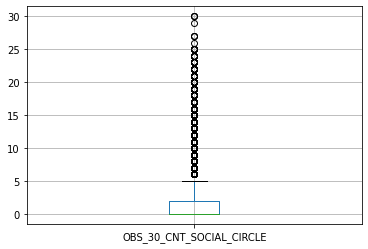

In [89]:
plt.figure
data.boxplot(["OBS_30_CNT_SOCIAL_CIRCLE"])

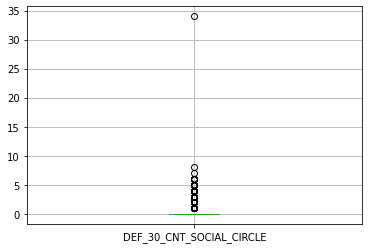

In [90]:
plt.figure
data.boxplot(["DEF_30_CNT_SOCIAL_CIRCLE"])

In [91]:
(data["DEF_30_CNT_SOCIAL_CIRCLE"]>6).sum()

3

In [92]:
data["DEF_30_CNT_SOCIAL_CIRCLE"] = np.where(data["DEF_30_CNT_SOCIAL_CIRCLE"]>=6,6,data["DEF_30_CNT_SOCIAL_CIRCLE"])

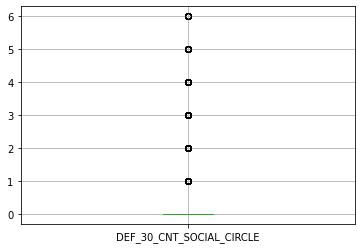

In [93]:
plt.figure
data.boxplot(["DEF_30_CNT_SOCIAL_CIRCLE"])

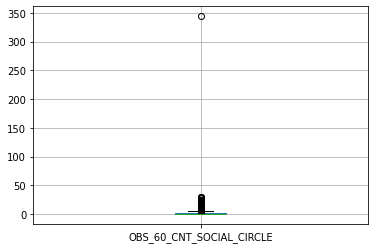

In [94]:
plt.figure
data.boxplot(["OBS_60_CNT_SOCIAL_CIRCLE"])

In [95]:
(data["OBS_60_CNT_SOCIAL_CIRCLE"]>30).sum()

1

In [96]:
data["OBS_60_CNT_SOCIAL_CIRCLE"] = np.where(data["OBS_60_CNT_SOCIAL_CIRCLE"]>=30,30,data["OBS_60_CNT_SOCIAL_CIRCLE"])

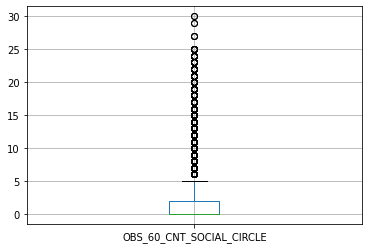

In [97]:
plt.figure
data.boxplot(["OBS_60_CNT_SOCIAL_CIRCLE"])

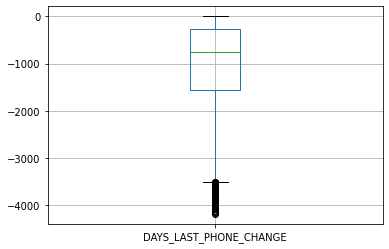

In [98]:
plt.figure
data.boxplot(["DAYS_LAST_PHONE_CHANGE"])

In [99]:
data.drop(["DAYS_LAST_PHONE_CHANGE"],axis =1, inplace = True)
test_data.drop(["DAYS_LAST_PHONE_CHANGE"],axis =1, inplace = True)

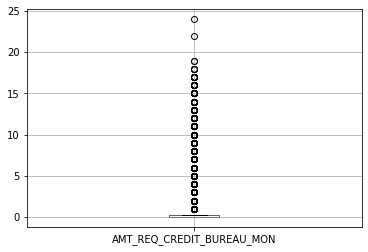

In [100]:
plt.figure
data.boxplot(["AMT_REQ_CREDIT_BUREAU_MON"])

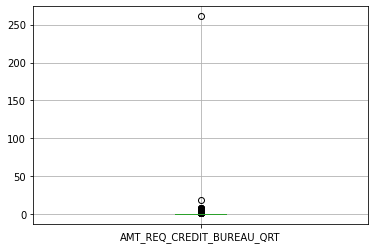

In [101]:
plt.figure
data.boxplot(["AMT_REQ_CREDIT_BUREAU_QRT"])

In [102]:
(data["AMT_REQ_CREDIT_BUREAU_QRT"]>4).sum()

65

In [103]:
data["AMT_REQ_CREDIT_BUREAU_QRT"] = np.where(data["AMT_REQ_CREDIT_BUREAU_QRT"]>=4,4,data["AMT_REQ_CREDIT_BUREAU_QRT"])

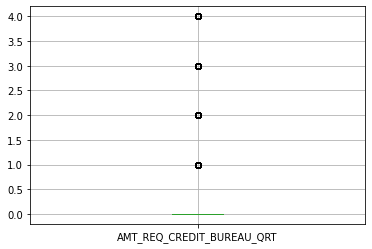

In [104]:
plt.figure
data.boxplot(["AMT_REQ_CREDIT_BUREAU_QRT"])

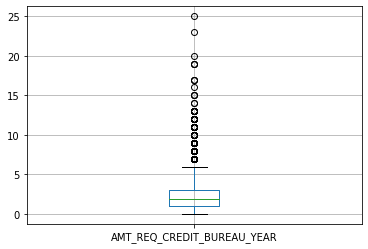

In [105]:
plt.figure
data.boxplot(["AMT_REQ_CREDIT_BUREAU_YEAR"])

In [106]:
print(data.shape)
print(test_data.shape)

(184506, 91)
(123005, 90)


In [107]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,0,0,0,1,1,67500.0,227520.0,11065.5,180000.0,1,1,4,1,1,0.018634,-17210,-755,1,1,1,1,0,0,14,3.0,2,2,6,12,0,0,0,0,0,0,5,0.264354,0.510894,0.012400,0.944400,0.000000,0.034500,0.041700,0.009500,0.012600,0.944400,0.000000,0.034500,0.041700,0.00990,0.012500,0.944400,0.00000,0.034500,0.041700,0.009600,0,0.007400,1,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,0,1,1,1,1,247500.0,1882372.5,65560.5,1719000.0,6,7,1,0,1,0.018850,-18640,-2175,1,1,0,1,0,1,10,3.0,2,2,5,10,0,0,0,0,1,1,5,0.172251,0.686382,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,0,1,1,1,1,180000.0,101880.0,10827.0,90000.0,5,7,1,1,1,0.022625,-14649,-4568,1,1,1,1,0,0,8,3.0,2,2,1,14,0,0,0,0,0,0,55,0.636218,0.540654,0.197900,0.984100,0.160000,0.069000,0.458300,0.103300,0.201700,0.984100,0.161100,0.069000,0.458300,0.10760,0.199900,0.984100,0.16000,0.069000,0.458300,0.105100,0,0.178900,4,0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,0,1,0,0,0,81000.0,405000.0,20677.5,405000.0,6,7,4,3,5,0.035792,-12762,-4618,1,1,1,1,1,0,8,1.0,2,2,6,18,0,0,0,0,1,1,33,0.599924,0.337673,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,7.0,1.0,7.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,0,0,0,1,0,157500.0,888840.0,29506.5,675000.0,6,7,4,0,1,0.018801,-16329,-4624,1,1,0,1,0,0,14,2.0,2,2,5,9,0,0,0,0,1,1,5,0.312779,0.819318,0.117193,0.977795,0.078558,0.149578,0.225968,0.107146,0.113888,0.977083,0.074057,0.144987,0.221899,0.10566,0.117568,0.977831,0.07769,0.149065,0.225543,0.108348,0,0.102215,4,0,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [108]:
data["NAME_CONTRACT_TYPE"].head()

0    0
1    0
2    0
3    0
4    0
Name: NAME_CONTRACT_TYPE, dtype: int64

In [109]:
# import pandas as pd
# from sklearn import preprocessing

# x = data.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# data = pd.DataFrame(x_scaled)

In [110]:
# from sklearn.preprocessing import Normalizer
# transformer = Normalizer().fit(data)  # fit does nothing.
# transformer
# Normalizer()
# transformer.transform(data)

**STANDARDIZATION**

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler()

StandardScaler()


StandardScaler()

STANDARDIZATION GAVE BETTER RESULT THAN NORMALIZATION

TRIED to use oversampling while using logistic

In [112]:
# from imblearn.over_sampling import SMOTE

# smote=SMOTE(1,random_state=42)
# X_train,y_train=smote.fit_resample(X_train,Y_train)

In [113]:
# breakpoint....

TRAIN_TEST_SPLIT

In [114]:
from sklearn.model_selection import train_test_split
Y_train = data.TARGET
X_train=data.drop(axis=1, labels = "TARGET",inplace = False)
X_train, X_test, y_train, y_test = train_test_split( X_train, Y_train, test_size=0.33, random_state=42)

# Importing required evaluation metrics

In [115]:
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,accuracy_score

# Fitting XGBoost model

In [116]:
from xgboost import XGBClassifier

In [117]:
XGBOOST = XGBClassifier(base_score=0.5,scale_pos_weight=6,max_depth = 5,eta = 0.25)

In [118]:
# XGBOOST.fit(X_train, Y_train)
XGBOOST.fit(X_train, y_train)   

XGBClassifier(eta=0.25, max_depth=5, scale_pos_weight=6)

In [119]:
XG_preds = XGBOOST.predict(X_test)

In [120]:
print(Counter(XG_preds))
print(roc_auc_score(y_test, XG_preds))
print(accuracy_score(y_test,XG_preds))
print(f1_score(y_test,XG_preds))

Counter({0: 52601, 1: 8286})
0.6439067282779537
0.8479314139307241
0.2978691135208918


In [ ]:
# predictions1 = XGBOOST.predict(test_data)

In [ ]:
# final_submission = pd.DataFrame()

# final_submission["SK_ID_CURR"] = test_data["SK_ID_CURR"] 
# final_submission["TARGET"] = predictions1


In [ ]:
# final_submission.to_csv('out20.csv',index = False)

# Fitting logistic regression Model

In [121]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=0)
LR_model.fit(X_train,y_train)
LR_preds = LR_model.predict(X_test)

In [122]:
print(Counter(LR_preds))
print(roc_auc_score(y_test, LR_preds))
print(accuracy_score(y_test,LR_preds))
print(f1_score(y_test,LR_preds))

Counter({0: 60886, 1: 1})
0.4999910691958704
0.9194902031632368
0.0


# Fitting Random Forest

In [ ]:
#Tried hyperparameter tuning for random forest
#  from sklearn.datasets import make_classification
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.experimental import enable_halving_search_cv  
# from sklearn.model_selection import HalvingGridSearchCV

# param_grid = {'max_depth': [2, 6, 9],
#                'min_samples_split': [3, 5, 8]}
# base_estimator = RandomForestClassifier(random_state=1)
# X, y = make_classification(n_samples=500, random_state=2)
# sh = HalvingGridSearchCV(base_estimator, param_grid, cv=3,
#                           factor=1, resource='n_estimators',
#                           max_resources=20).fit(X, y)
# sh.best_estimator_
# RandomForestClassifier(max_depth=3, n_estimators=21, random_state=1)

In [123]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(max_depth=2, random_state=1)
RF_model.fit(X_train, y_train)
RF_preds = RF_model.predict(X_test)

In [124]:
print(Counter(RF_preds))
print(roc_auc_score(y_test, RF_preds))
print(accuracy_score(y_test,RF_preds))
print(f1_score(y_test,RF_preds))

Counter({0: 60887})
0.5
0.9195066270304005
0.0


# KNN Model Fitting

In [125]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)
KNN_preds = KNN_model.predict(X_test)

In [126]:
print(Counter(KNN_preds))
print(roc_auc_score(y_test, KNN_preds))
print(accuracy_score(y_test,KNN_preds))
print(f1_score(y_test,KNN_preds))

Counter({0: 60447, 1: 440})
0.5022836909857074
0.9141195986006865
0.020969855832241154


# Fitting SVM clasiffier

In [ ]:
# took a long time to train this model and the score was not satisfactory
# from xgboost import XGBClassifier
# XGB_model = XGBClassifier(scale_pos_weight=10,learning_rate=0.3,max_depth=6)
# XGB_model.fit(X_train, y_train)
# XGB_preds = XGB_model.predict(X_test)

In [ ]:
# print(Counter(LR_preds))
# print(roc_auc_score(y_test, LR_preds))
# print(accuracy_score(y_test,LR_preds))
# print(f1_score(y_test,LR_preds))

# Fitting neural network


In [127]:
NN_X_train = X_train.copy() 
NN_y_train = y_train.copy()
NN_X_test = X_test.copy()
NN_test_data = test_data.copy()

In [128]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(NN_X_train)  
NN_X_train = scaler.transform(NN_X_train)  
NN_X_test = scaler.transform(NN_X_test)  

In [129]:
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier(solver='lbfgs', alpha=1e-2,hidden_layer_sizes=(15, 12), random_state=1)
NN_model.fit(X_train, y_train)
NN_preds = NN_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [130]:
print(Counter(NN_preds))
print(roc_auc_score(y_test, NN_preds))
print(accuracy_score(y_test,NN_preds))
print(f1_score(y_test,NN_preds))

Counter({1: 60887})
0.5
0.08049337296959942
0.1489937374597191


# Fitting neural network 2 using keras

In [ ]:
# NN2_model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(128, input_shape=X_train[0].shape),
#     tf.keras.layers.Dense(128, activation='sigmoid'),
#     tf.keras.layers.Dense(128, activation='sigmoid'),
#     tf.keras.layers.Dense(128, activation='sigmoid'),
#     tf.keras.layers.Dense(128, activation='sigmoid'),
#     tf.keras.layers.Dense(1)
# ])

# NN2_model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy','auc','f1'])

# NN2_model.fit(X_train, y_train, epochs=5)
# NN2_model.evaluate(X_test, y_test)
# NN2_preds = NN2_model.predict(X_test)

In [ ]:
# print(Counter(LR_preds))
# print(roc_auc_score(y_test, NN2_preds))
# print(accuracy_score(y_test,NN2_preds))
# print(f1_score(y_test,NN2_preds))

# Saving the models for future use

In [ ]:
# This code was written to save the model so we don't have to train it again and again


# # Save Model Using Pickle
# import pandas
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# import pickle
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# test_size = 0.33
# seed = 7
# X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# # Fit the model on training set
# model = LogisticRegression()
# model.fit(X_train, Y_train)
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# # some time later...

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

# Prediction on the test data using the our best model 

In [131]:
predictions1 = XGBOOST.predict(test_data)

# Saving model to csv file

In [ ]:
# final_submission = pd.DataFrame()

# final_submission["SK_ID_CURR"] = test_data["SK_ID_CURR"] 
# final_submission["TARGET"] = predictions1
